# <center> Data Import
### Import Preliminaries

In [70]:
%matplotlib inline

# Import modules
import pandas as pd
import matplotlib.pyplot as plt

# Import data
train_df = pd.DataFrame(pd.read_csv('https://www.dropbox.com/s/4ql1hg0xs9vxpii/train.csv?dl=1'))
test_df = pd.DataFrame(pd.read_csv('https://www.dropbox.com/s/a3i65o49at9mogv/test.csv?dl=1'))
sample = pd.DataFrame(pd.read_csv('https://www.dropbox.com/s/2v1a4xvorfw85sy/gender_submission.csv?dl=1'))

# Set pandas options
pd.set_option('precision',1)
pd.set_option('max_columns',100)
pd.set_option('max_rows',100)

### View Submission

In [2]:
sample.head(5)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


### View Training Data

In [4]:
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Analyzing Training Data

In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [18]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.0,891.0,891.0,714.0,891.0,891.0,891.0
mean,446.0,0.4,2.3,29.7,0.5,0.4,32.2
std,257.4,0.5,0.8,14.5,1.1,0.8,49.7
min,1.0,0.0,1.0,0.4,0.0,0.0,0.0
25%,223.5,0.0,2.0,20.1,0.0,0.0,7.9
50%,446.0,0.0,3.0,28.0,0.0,0.0,14.5
75%,668.5,1.0,3.0,38.0,1.0,0.0,31.0
max,891.0,1.0,3.0,80.0,8.0,6.0,512.3


### Null Values

In [20]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Locating Class Imbalance

In [24]:
pd.DataFrame(train_df.Survived.value_counts())

,Survived
0,549
1,342


### Ticket Classes

In [25]:
train_df.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

### Passenger Sex Classes

In [39]:
train_df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

### Age Distribution

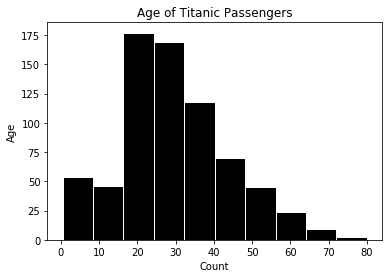

In [38]:
train_df.Age.hist(color='black', grid=False, 
                  edgecolor='w')
plt.ylabel('Count')
plt.xlabel('Age')
plt.title('Age of Titanic Passengers')

### Sibling/Spouses Member on Board

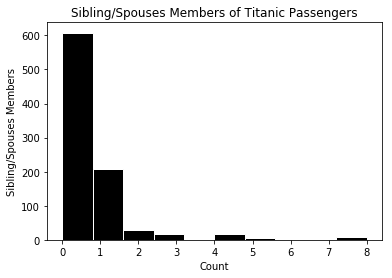

In [43]:
train_df.SibSp.hist(color='black', grid=False, 
                  edgecolor='w')
plt.ylabel('Count')
plt.xlabel('Sibling/Spouses Members')
plt.title('Sibling/Spouses Members of Titanic Passengers')

### Parents/Childer Members on Board

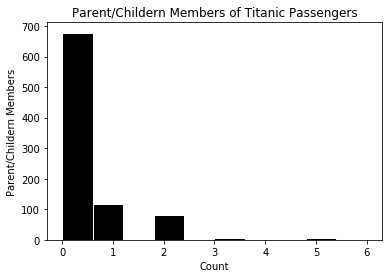

In [45]:
train_df.Parch.hist(color='black', grid=False, 
                  edgecolor='w')
plt.ylabel('Count')
plt.xlabel('Parent/Childern Members')
plt.title('Parent/Childern Members of Titanic Passengers')

### Ticket Number

In [47]:
train_df.Ticket.sample(10)

15              248706
205             347054
722              12233
826               1601
854             244252
815             112058
740              16988
89              343275
563    SOTON/OQ 392082
820              12749
Name: Ticket, dtype: object

### Fare Prices

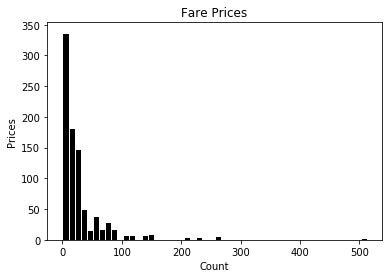

In [53]:
train_df.Fare.hist(color='black', grid=False, 
                  edgecolor='w', bins=50)
plt.xlabel('Count')
plt.ylabel('Prices')
plt.title('Fare Prices')

### Cabin Numbers

In [64]:
# All the cabin numbers
print(list(pd.DataFrame(train_df.Cabin.value_counts()).index))

['B96 B98', 'G6', 'C23 C25 C27', 'F2', 'D', 'C22 C26', 'E101', 'F33', 'B35', 'B49', 'E121', 'E24', 'C123', 'E25', 'B20', 'B28', 'C124', 'F G73', 'B77', 'D33', 'C2', 'B58 B60', 'D35', 'E33', 'D17', 'C92', 'B18', 'C83', 'D36', 'B5', 'D26', 'B57 B59 B63 B66', 'F4', 'E44', 'E67', 'E8', 'C93', 'C52', 'B51 B53 B55', 'C125', 'D20', 'C65', 'B22', 'C68', 'C78', 'C126', 'C30', 'B42', 'C50', 'D21', 'D10 D12', 'E50', 'E68', 'C82', 'A23', 'F38', 'C45', 'B86', 'E36', 'C104', 'A16', 'D6', 'C7', 'B30', 'D50', 'D19', 'C47', 'B79', 'T', 'B82 B84', 'C46', 'A14', 'C106', 'D56', 'C86', 'A32', 'B94', 'A7', 'E17', 'D9', 'C91', 'D15', 'A5', 'D47', 'A10', 'D45', 'F G63', 'A20', 'D28', 'A26', 'C87', 'B38', 'E77', 'C111', 'B78', 'E49', 'C118', 'B39', 'B73', 'C101', 'E10', 'E46', 'B4', 'C110', 'D11', 'A24', 'B3', 'A6', 'E40', 'B69', 'C62 C64', 'C85', 'C54', 'C90', 'B101', 'C148', 'F E69', 'E12', 'C49', 'E58', 'A19', 'D7', 'A36', 'C70', 'B80', 'D46', 'D49', 'C128', 'C99', 'E34', 'E38', 'D30', 'B50', 'C32', 'D37', 

In [65]:
# Cabin Value Counts
pd.DataFrame(train_df.Cabin.value_counts())

,Cabin
B96 B98,4
G6,4
C23 C25 C27,4
F2,3
D,3
C22 C26,3
E101,3
F33,3
B35,2
B49,2


### Port of Embarkation

In [68]:
train_df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

## <center> Joints Distributions

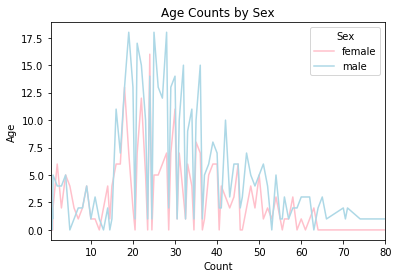

In [78]:
# Cross Distribution between age and sex
pd.crosstab(train_df.Sex, train_df.Age).T.plot(
  color=['pink','lightblue'])
plt.xlabel('Count')
plt.ylabel('Age')
plt.title('Age Counts by Sex')

In [95]:
# Isolating Cabin Sections
train_df['Section'] = train_df.Cabin.str[0]
train_df.Sections.value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

In [94]:
# Mean ticket fair for each cabin section
train_df.groupby('Section')['Fare'].mean()

Section
A     39.6
B    113.5
C    100.2
D     57.2
E     46.0
F     18.7
G     13.6
T     35.5
Name: Fare, dtype: float64